## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import sklearn
print(sklearn.__version__)
%matplotlib inline

0.23.2


## 讀入資料

In [2]:
df_train = pd.read_csv(r'D:\ML100\Day35\Titanic_train.csv')

## 觀察 Age

In [3]:
#觀察Age遺失值比例約19.9%
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

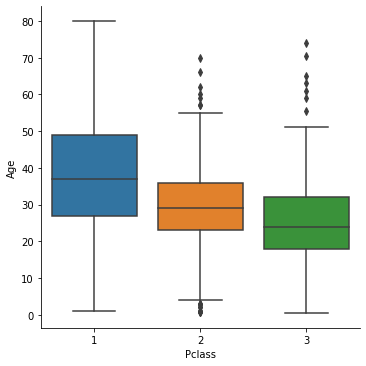

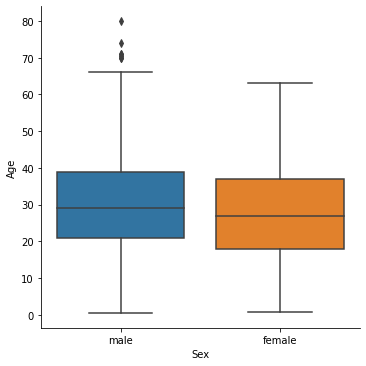

In [13]:
#step1:  Age 和 Pclass 與 Sex 在圖形上觀察有關連性
g1 = sns.catplot(x="Pclass", y="Age",  data=df_train, kind="box")
g2 = sns.catplot(x="Sex", y="Age",  data=df_train, kind="box")


In [4]:
#step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。
tmp_fill = df_train[['Age','Pclass','Sex']]
tmp_fill

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male
...,...,...,...
886,27.0,2,male
887,19.0,1,female
888,NaN,3,female
889,26.0,1,male


In [19]:
#####透過 KNN 進行補值 => 調整不同參數的效果

#  1. K=5,weight=uniform

#step1:離散轉連續
tmp1 = tmp_fill.copy() #複製一份資料給tmp
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換

from sklearn import preprocessing
#male=1, female=0 
le = preprocessing.LabelEncoder()
tmp1['Sex']=le.fit_transform(tmp1['Sex'])
display(tmp1)

#Step 2 :計算點與點之間的距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(tmp1)))

#Step3: 透過 KNN 進行補值
# 設定 k 值 = 5
value_neighbors = 5
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors = value_neighbors)
df_filled_k5 = pd.DataFrame(imputer.fit_transform(tmp1))
display(df_filled_k5)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


,0,1,2
0,22.00,3.0,1.0
1,38.00,1.0,0.0
2,26.00,3.0,0.0
3,35.00,1.0,0.0
4,35.00,3.0,1.0
...,...,...,...
886,27.00,2.0,1.0
887,19.00,1.0,0.0
888,13.95,3.0,0.0
889,26.00,1.0,1.0


In [20]:
#Step4: 判斷補值的好壞 *************************************************
# Step4.1: 取無遺失值的資料集 
import random
completet_data1 = tmp1.dropna()
#重製index
completet_data1 = completet_data1.reset_index(drop=True)
display(completet_data1)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


In [21]:
# Step4.2: 隨機取140個點當作遺失值 ?? 通常取多少? 20%?
a1 = random.sample(list(completet_data1.index),140) #要取出的索引給到a1
#display(a1)
missing_data1 = completet_data1.copy()
missing_data1['Age'].iloc[a1] = np.nan
display(missing_data1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,NaN,3,1
...,...,...,...
709,39.0,3,0
710,NaN,2,1
711,19.0,1,0
712,NaN,1,1


In [28]:
# Step4.3: 以上一步產生的遺失值進行補植
verify_impute1 = pd.DataFrame(imputer.fit_transform(missing_data1))
verify_impute1.rename(columns={0:'Age',1:'Pclass',2:'Sex'},inplace=True)
display(verify_impute1)

,Age,Pclass,Sex
0,22.000,3.0,1.0
1,38.000,1.0,0.0
2,26.000,3.0,0.0
3,35.000,1.0,0.0
4,31.200,3.0,1.0
...,...,...,...
709,39.000,3.0,0.0
710,35.200,2.0,1.0
711,19.000,1.0,0.0
712,28.784,1.0,1.0


In [29]:
display(completet_data1)
display(verify_impute1)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


,Age,Pclass,Sex
0,22.000,3.0,1.0
1,38.000,1.0,0.0
2,26.000,3.0,0.0
3,35.000,1.0,0.0
4,31.200,3.0,1.0
...,...,...,...
709,39.000,3.0,0.0
710,35.200,2.0,1.0
711,19.000,1.0,0.0
712,28.784,1.0,1.0


In [30]:
# Step4.4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error
y_true1 = completet_data1['Age']
y_pred1 = verify_impute1['Age']
MSE_k5 = mean_squared_error(y_true1,y_pred1)
print(MSE_k5)

41.21117435294117


In [31]:
#   試試 K = 10

#Step3: 透過 KNN 進行補值
# 設定 k 值 = 10
value_neighbors = 10
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors = value_neighbors)
df_filled_k10 = pd.DataFrame(imputer.fit_transform(tmp1))
display(df_filled_k10)

,0,1,2
0,22.000,3.0,1.0
1,38.000,1.0,0.0
2,26.000,3.0,0.0
3,35.000,1.0,0.0
4,35.000,3.0,1.0
...,...,...,...
886,27.000,2.0,1.0
887,19.000,1.0,0.0
888,16.075,3.0,0.0
889,26.000,1.0,1.0


In [33]:
#k=10,weight=uniform

#Step4: 判斷補值的好壞 *************************************************
# Step4.1: 取無遺失值的資料集 
import random
completet_data2 = tmp1.dropna()
#重製index
completet_data2 = completet_data2.reset_index(drop=True)
display(completet_data2)

# Step4.2: 隨機取140個點當作遺失值 ?? 通常取多少? 20%?
a1 = random.sample(list(completet_data2.index),140) #要取出的索引給到a1
#display(a1)
missing_data2 = completet_data2.copy()
missing_data2['Age'].iloc[a1] = np.nan
display(missing_data2)

# Step4.3: 以上一步產生的遺失值進行補植
verify_impute2 = pd.DataFrame(imputer.fit_transform(missing_data2))
verify_impute2.rename(columns={0:'Age',1:'Pclass',2:'Sex'},inplace=True)
display(verify_impute2)

# Step4.4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error
y_true2 = completet_data2['Age']
y_pred2 = verify_impute2['Age']
MSE_k10 = mean_squared_error(y_true2,y_pred2)
print(MSE_k10)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Pclass,Sex
0,NaN,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,NaN,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


,Age,Pclass,Sex
0,22.6,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,22.6,3.0,1.0
...,...,...,...
709,39.0,3.0,0.0
710,27.0,2.0,1.0
711,19.0,1.0,0.0
712,26.0,1.0,1.0


40.52449761764706


In [34]:
#   試試 K = 20, weight = unifrom

#Step3: 透過 KNN 進行補值
# 設定 k 值 = 20
value_neighbors = 20
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors = value_neighbors)
df_filled_k20 = pd.DataFrame(imputer.fit_transform(tmp1))
display(df_filled_k20)

#k=20,weight=uniform

#Step4: 判斷補值的好壞 *************************************************
# Step4.1: 取無遺失值的資料集 
import random
completet_data3 = tmp1.dropna()
#重製index
completet_data3 = completet_data3.reset_index(drop=True)
display(completet_data3)

# Step4.2: 隨機取140個點當作遺失值 ?? 通常取多少? 20%?
a1 = random.sample(list(completet_data3.index),140) #要取出的索引給到a1
#display(a1)
missing_data3 = completet_data3.copy()
missing_data3['Age'].iloc[a1] = np.nan
display(missing_data3)

# Step4.3: 以上一步產生的遺失值進行補植
verify_impute3 = pd.DataFrame(imputer.fit_transform(missing_data3))
verify_impute3.rename(columns={0:'Age',1:'Pclass',2:'Sex'},inplace=True)
display(verify_impute3)

# Step4.4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error
y_true3 = completet_data3['Age']
y_pred3 = verify_impute3['Age']
MSE_k20 = mean_squared_error(y_true3,y_pred3)
print(MSE_k20)

,0,1,2
0,22.0000,3.0,1.0
1,38.0000,1.0,0.0
2,26.0000,3.0,0.0
3,35.0000,1.0,0.0
4,35.0000,3.0,1.0
...,...,...,...
886,27.0000,2.0,1.0
887,19.0000,1.0,0.0
888,20.3125,3.0,0.0
889,26.0000,1.0,1.0


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Pclass,Sex
0,22.0,3,1
1,NaN,1,0
2,26.0,3,0
3,NaN,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,NaN,1,0
712,26.0,1,1


,Age,Pclass,Sex
0,22.0,3.0,1.0
1,36.9,1.0,0.0
2,26.0,3.0,0.0
3,36.9,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
709,39.0,3.0,0.0
710,27.0,2.0,1.0
711,36.9,1.0,0.0
712,26.0,1.0,1.0


36.617627517506996


In [35]:
#   試試 K = 20, weight = distance

#Step3: 透過 KNN 進行補值
# 設定 k 值 = 20, weight = distance
value_neighbors = 20
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors = value_neighbors,weights='distance')
df_filled_k20_dis = pd.DataFrame(imputer.fit_transform(tmp1))
display(df_filled_k20_dis)

#k=20,weight = distance

#Step4: 判斷補值的好壞 *************************************************
# Step4.1: 取無遺失值的資料集 
import random
completet_data4 = tmp1.dropna()
#重製index
completet_data4 = completet_data4.reset_index(drop=True)
display(completet_data4)

# Step4.2: 隨機取140個點當作遺失值 ?? 通常取多少? 20%?
a1 = random.sample(list(completet_data4.index),140) #要取出的索引給到a1
#display(a1)
missing_data4 = completet_data4.copy()
missing_data4['Age'].iloc[a1] = np.nan
display(missing_data4)

# Step4.3: 以上一步產生的遺失值進行補植
verify_impute4 = pd.DataFrame(imputer.fit_transform(missing_data4))
verify_impute4.rename(columns={0:'Age',1:'Pclass',2:'Sex'},inplace=True)
display(verify_impute4)

# Step4.4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error
y_true4 = completet_data4['Age']
y_pred4 = verify_impute4['Age']
MSE_k20_dis = mean_squared_error(y_true4,y_pred4)
print(MSE_k20_dis)

,0,1,2
0,22.0000,3.0,1.0
1,38.0000,1.0,0.0
2,26.0000,3.0,0.0
3,35.0000,1.0,0.0
4,35.0000,3.0,1.0
...,...,...,...
886,27.0000,2.0,1.0
887,19.0000,1.0,0.0
888,20.3125,3.0,0.0
889,26.0000,1.0,1.0


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,19.0,1,0
712,26.0,1,1


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
709,39.0,3,0
710,27.0,2,1
711,NaN,1,0
712,26.0,1,1


,Age,Pclass,Sex
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
709,39.0,3.0,0.0
710,27.0,2.0,1.0
711,29.6,1.0,0.0
712,26.0,1.0,1.0


28.528285842436972


In [36]:
#發現當K取越大MSE越小
#當K取20時比較權重的不同對於補值的影響,發現distance的誤差較uniform小
print(MSE_k5)
print(MSE_k10)
print(MSE_k20)
print(MSE_k20_dis)


41.21117435294117
40.52449761764706
36.617627517506996
28.528285842436972
